
---
<h1 style="text-align: center;">Tarea 2: IN5244 - Ciencia de Datos</h1>
<h1 style="text-align: center;">Cristopher Urbina</h1>

---


In [87]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from pyreadline3.console import color
from scipy import stats
from sklearn.linear_model import LinearRegression
from sqlalchemy.sql import label
from sympy.integrals.meijerint_doc import category

In [2]:
# Estilo de gráficos
custom_params = {
    'axes.facecolor': '#1a1a1a',  # Fondo oscuro para el área de trazado
    'figure.facecolor': '#1a1a1a',  # Fondo oscuro para la figura
    'axes.labelcolor': 'white',  # Color blanco para las etiquetas de los ejes
    'xtick.color': 'white',  # Color blanco para los ticks en el eje X
    'ytick.color': 'white',  # Color blanco para los ticks en el eje Y
    'text.color': 'white',  # Color blanco para el texto en general
    'axes.grid': True,  # Activar la cuadrícula
    'grid.color': '#444444',  # Color de la cuadrícula
    'grid.linestyle': ':',  # Estilo de la cuadrícula
    'axes.edgecolor': 'white',  # Color de los bordes de los ejes
    'axes.titlecolor': 'white',  # Color blanco para el título
    'legend.facecolor': '#1a1a1a',  # Fondo oscuro para la leyenda
    'legend.edgecolor': 'white',  # Bordes blancos para la leyenda
    'legend.framealpha': 0.7,  # Transparencia del fondo de la leyenda
    'font.family': 'sans-serif',  # Fuente sans-serif
}

# Aplicar el tema usando Seaborn
sns.set_theme(
    context='talk',
    style='darkgrid',  # Puedes cambiar a 'dark', 'whitegrid', etc.
    palette='Purples_r',
    rc=custom_params
)

---


## Pregunta 1

In [192]:
df = pd.read_stata('../data/casestudy_dropout.dta')
df.head()

,IDstudent,IDschool,SchoolGrade2022,DropoutDate,DayOfWeekDroppedOut,PrioritaryStudentIn2021,Female,Age,GPAin2021,AttendanceIn2021,GraduatedIn2021,Migrant,ListedInDropoutReport,SchoolPrincipalADP,EnrolledByAug312022,GraduatedIn2022,MunicipalSchool,SchoolDaysFromMay302022,DroppedOutMay30Before
0,1.0,1,12.0,2022-06-17,5.0,0,0,18,2.0,55,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-14,0.0
1,2.0,1,9.0,2022-05-13,5.0,0,1,15,2.5,55,0.0,0.0,1.0,1.0,1.0,0.0,1.0,11,1.0
2,3.0,1,10.0,2022-04-20,3.0,1,1,14,4.9,88,1.0,0.0,0.0,1.0,0.0,0.0,1.0,28,1.0
3,4.0,4,10.0,2022-05-02,1.0,1,1,14,5.8,90,1.0,0.0,1.0,1.0,0.0,0.0,1.0,20,1.0
4,5.0,4,12.0,2022-06-15,3.0,0,1,17,4.6,100,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-12,0.0


In [58]:
frecuencies = df['SchoolDaysFromMay302022'].value_counts()
frecuencies

SchoolDaysFromMay302022
-27    307
-26    273
-28    245
-30    207
 20    197
      ... 
-4      85
-23     72
-25     43
-24     27
-15     13
Name: count, Length: 61, dtype: int64

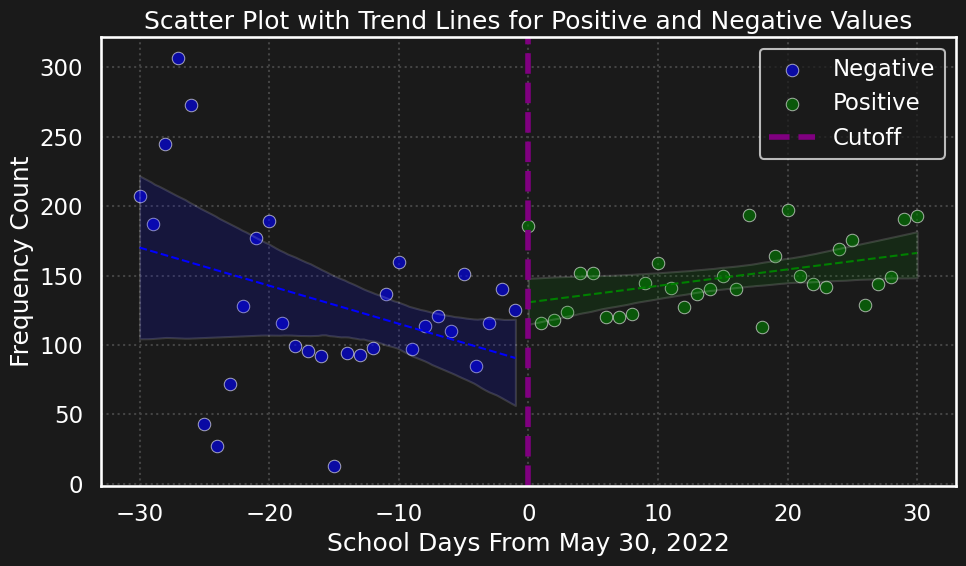

In [88]:
# Crear las frecuencias
frequencies = df['SchoolDaysFromMay302022'].value_counts().reset_index()
frequencies.columns = ['SchoolDaysFromMay302022', 'count']  # Renombrar columnas

# Crear un cutoff en 0
frequencies['cutoff'] = np.where(frequencies['SchoolDaysFromMay302022'] >= 0, 'Positive', 'Negative')

# Crear el scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot para valores negativos
sns.scatterplot(data=frequencies[frequencies['cutoff'] == 'Negative'], 
                x='SchoolDaysFromMay302022', 
                y='count', 
                color='blue', 
                alpha=0.6, label='Negative')

# Scatter plot para valores positivos
sns.scatterplot(data=frequencies[frequencies['cutoff'] == 'Positive'], 
                x='SchoolDaysFromMay302022', 
                y='count', 
                color='green', 
                alpha=0.6, label='Positive')

# Agregar líneas de tendencia para valores negativos
sns.regplot(data=frequencies[frequencies['cutoff'] == 'Negative'], 
            x='SchoolDaysFromMay302022', 
            y='count', 
            scatter=False, 
            color='blue', 
            line_kws={'linestyle': '--', 'linewidth': 1.5})

# Agregar líneas de tendencia para valores positivos
sns.regplot(data=frequencies[frequencies['cutoff'] == 'Positive'], 
            x='SchoolDaysFromMay302022', 
            y='count', 
            scatter=False, 
            color='green', 
            line_kws={'linestyle': '--', 'linewidth': 1.5})

# Etiquetas y título
plt.title('Scatter Plot with Trend Lines for Positive and Negative Values')
plt.xlabel('School Days From May 30, 2022')
plt.ylabel('Frequency Count')
plt.axvline(0, color='purple', linewidth=4, linestyle='--', label='Cutoff')  # Línea vertical en x=0
plt.legend()
plt.tight_layout()

output_dir = '../figures'
os.makedirs(output_dir, exist_ok=True)

plt.savefig(os.path.join(output_dir, 'Scatter Plot.png'))

# Mostrar la gráfica
plt.show()

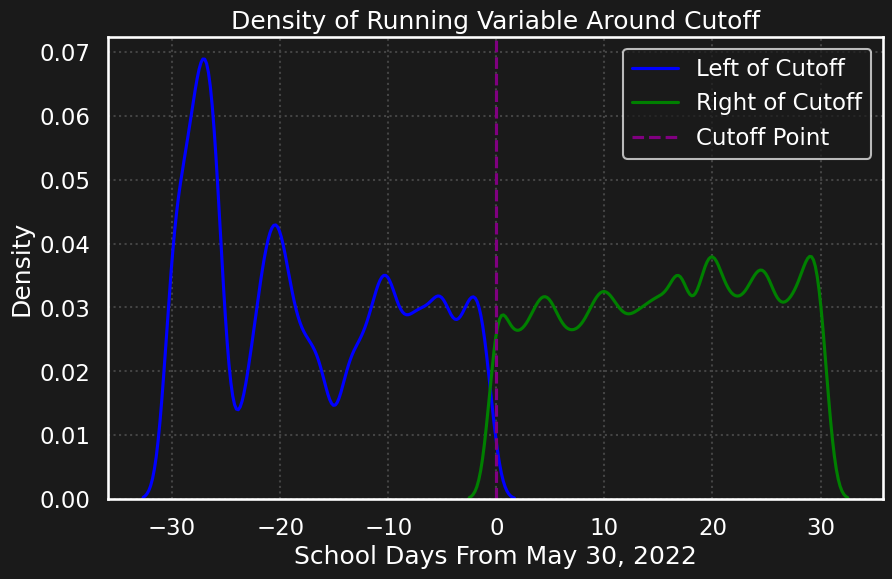

In [72]:
# Definir el punto de corte
cutoff = 0

# Crear un gráfico de densidad
plt.figure(figsize=(10, 6))

# Graficar la densidad de la running variable
sns.kdeplot(data=df[df['SchoolDaysFromMay302022'] < cutoff]['SchoolDaysFromMay302022'], 
             bw_adjust=0.5, label='Left of Cutoff', color='blue')

sns.kdeplot(data=df[df['SchoolDaysFromMay302022'] >= cutoff]['SchoolDaysFromMay302022'], 
             bw_adjust=0.5, label='Right of Cutoff', color='green')

# Etiquetas y título
plt.axvline(cutoff, color='purple', linestyle='--', label='Cutoff Point')
plt.title('Density of Running Variable Around Cutoff')
plt.xlabel('School Days From May 30, 2022')
plt.ylabel('Density')
plt.legend()

# Mostrar la gráfica
plt.show()

In [77]:
# Crear variable indicadora para el lado del corte
df['is_right'] = (df['SchoolDaysFromMay302022'] >= cutoff).astype(int)

# Crear variable de frecuencia
df['frequency'] = df['SchoolDaysFromMay302022'].map(df['SchoolDaysFromMay302022'].value_counts())

# Ejecutar modelo de regresión
model = sm.OLS.from_formula('frequency ~ is_right + SchoolDaysFromMay302022', data=df)
results = model.fit()

# Resumen del modelo
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              frequency   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     457.3
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          2.39e-189
Time:                        11:37:42   Log-Likelihood:                -45212.
No. Observations:                8516   AIC:                         9.043e+04
Df Residuals:                    8513   BIC:                         9.045e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

## Pregunta 2

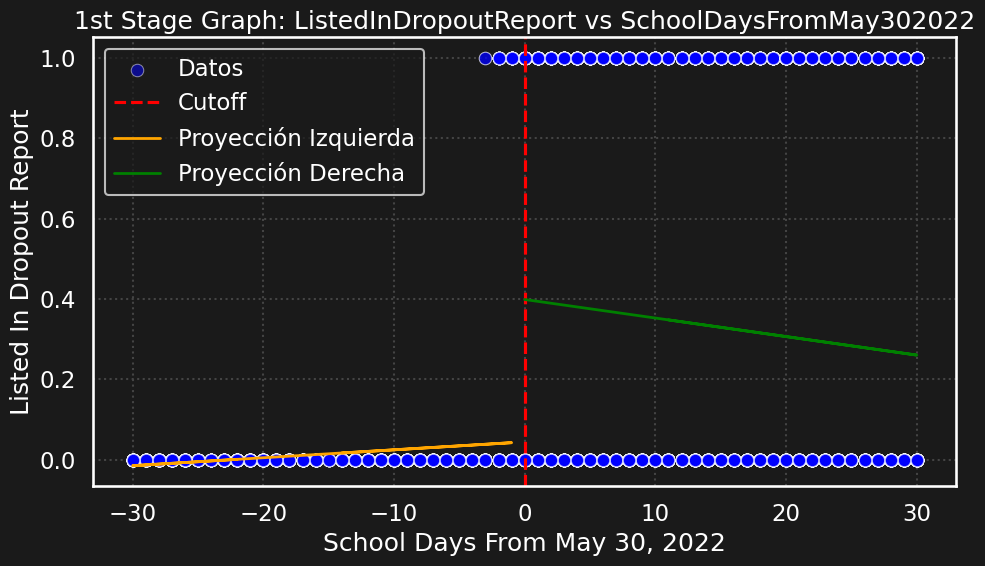

In [91]:
# Crear el modelo lineal a cada lado del cutoff
# Para ello, primero crearemos dos subconjuntos de datos
df_left = df[df['SchoolDaysFromMay302022'] < cutoff]
df_right = df[df['SchoolDaysFromMay302022'] >= cutoff]

# Ajustar los modelos lineales
model_left = sm.OLS(df_left['ListedInDropoutReport'], sm.add_constant(df_left['SchoolDaysFromMay302022'])).fit()
model_right = sm.OLS(df_right['ListedInDropoutReport'], sm.add_constant(df_right['SchoolDaysFromMay302022'])).fit()

# Predecir los valores ajustados
df_left['predicted'] = model_left.predict(sm.add_constant(df_left['SchoolDaysFromMay302022']))
df_right['predicted'] = model_right.predict(sm.add_constant(df_right['SchoolDaysFromMay302022']))

# Graficar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SchoolDaysFromMay302022', y='ListedInDropoutReport', alpha=0.5, color='blue', label='Datos')
plt.axvline(x=cutoff, color='red', linestyle='--', label='Cutoff')

# Superponer las proyecciones lineales
plt.plot(df_left['SchoolDaysFromMay302022'], df_left['predicted'], color='orange', label='Proyección Izquierda', linewidth=2)
plt.plot(df_right['SchoolDaysFromMay302022'], df_right['predicted'], color='green', label='Proyección Derecha', linewidth=2)

# Etiquetas y título
plt.title('1st Stage Graph: ListedInDropoutReport vs SchoolDaysFromMay302022')
plt.xlabel('School Days From May 30, 2022')
plt.ylabel('Listed In Dropout Report')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../figures/pregunta2.png')


plt.show()

In [95]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols('ListedInDropoutReport ~ DroppedOutMay30Before + SchoolDaysFromMay302022 + DroppedOutMay30Before:SchoolDaysFromMay302022 + C(IDschool)', data=df)
results = model.fit()

# Resumen del modelo
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     ListedInDropoutReport   R-squared:                       0.436
Model:                               OLS   Adj. R-squared:                  0.232
Method:                    Least Squares   F-statistic:                     2.139
Date:                   Fri, 04 Oct 2024   Prob (F-statistic):          7.65e-118
Time:                           12:34:31   Log-Likelihood:                -1526.1
No. Observations:                   8516   AIC:                             7580.
Df Residuals:                       6252   BIC:                         2.354e+04
Df Model:                           2263                                         
Covariance Type:               nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

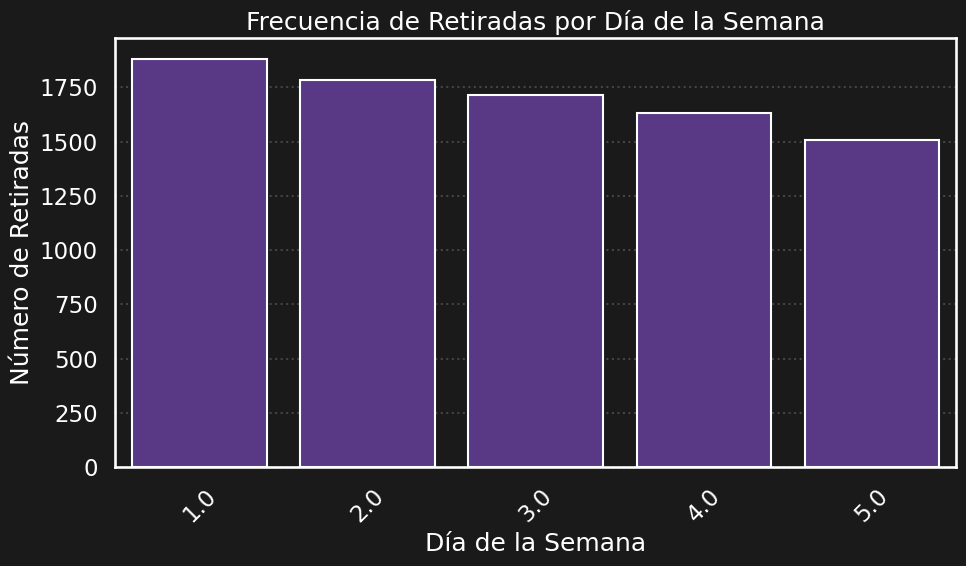

In [108]:
df['DayOfWeekDroppedOut'] = df['DayOfWeekDroppedOut'].astype('category')

# Contar la frecuencia de retiradas por día de la semana
frequency = df['DayOfWeekDroppedOut'].value_counts().sort_index()

# Graficar la frecuencia
plt.figure(figsize=(10, 6))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frecuencia de Retiradas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Retiradas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../figures/Frecuencia_dayweek.png')
plt.show()

In [112]:
import statsmodels.api as sm
import patsy

# Definir la fórmula para la regresión
formula = 'ListedInDropoutReport ~ DroppedOutMay30Before + SchoolDaysFromMay302022 + DroppedOutMay30Before:SchoolDaysFromMay302022 + C(IDschool) + C(DayOfWeekDroppedOut)'

# Ajustar el modelo con efectos fijos
model_with_dummies = sm.OLS.from_formula(formula, data=df)
results_with_dummies = model_with_dummies.fit()

# Resumen del modelo
print(results_with_dummies.summary())


                              OLS Regression Results                             
Dep. Variable:     ListedInDropoutReport   R-squared:                       0.437
Model:                               OLS   Adj. R-squared:                  0.233
Method:                    Least Squares   F-statistic:                     2.142
Date:                   Fri, 04 Oct 2024   Prob (F-statistic):          2.09e-118
Time:                           12:56:31   Log-Likelihood:                -1518.9
No. Observations:                   8516   AIC:                             7574.
Df Residuals:                       6248   BIC:                         2.356e+04
Df Model:                           2267                                         
Covariance Type:               nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

## Pregunta 3

In [122]:
# Ajustar el modelo de regresión discontinua para EnrolledByAug312022
formula_enrollment = 'EnrolledByAug312022 ~ DroppedOutMay30Before + SchoolDaysFromMay302022 + DroppedOutMay30Before:SchoolDaysFromMay302022 + C(IDschool) + C(DayOfWeekDroppedOut)'

# Ajustar el modelo
model_enrollment = sm.OLS.from_formula(formula_enrollment, data=df)
results_enrollment = model_enrollment.fit()

# Resumen del modelo
print(results_enrollment.summary())

                             OLS Regression Results                            
Dep. Variable:     EnrolledByAug312022   R-squared:                       0.342
Model:                             OLS   Adj. R-squared:                  0.103
Method:                  Least Squares   F-statistic:                     1.433
Date:                 Fri, 04 Oct 2024   Prob (F-statistic):           7.97e-27
Time:                         14:24:27   Log-Likelihood:                -2685.9
No. Observations:                 8516   AIC:                             9908.
Df Residuals:                     6248   BIC:                         2.590e+04
Df Model:                         2267                                         
Covariance Type:             nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [114]:
# Ajustar el modelo de regresión discontinua para GraduatedIn2022
formula_graduation = 'GraduatedIn2022 ~ DroppedOutMay30Before + SchoolDaysFromMay302022 + DroppedOutMay30Before:SchoolDaysFromMay302022 + C(IDschool) + C(DayOfWeekDroppedOut)'

# Ajustar el modelo
model_graduation = sm.OLS.from_formula(formula_graduation, data=df)
results_graduation = model_graduation.fit()

# Resumen del modelo
print(results_graduation.summary())


                            OLS Regression Results                            
Dep. Variable:        GraduatedIn2022   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     1.544
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           1.69e-38
Time:                        14:03:53   Log-Likelihood:                -3610.5
No. Observations:                8516   AIC:                         1.176e+04
Df Residuals:                    6248   BIC:                         2.775e+04
Df Model:                        2267                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## Pregunta 4

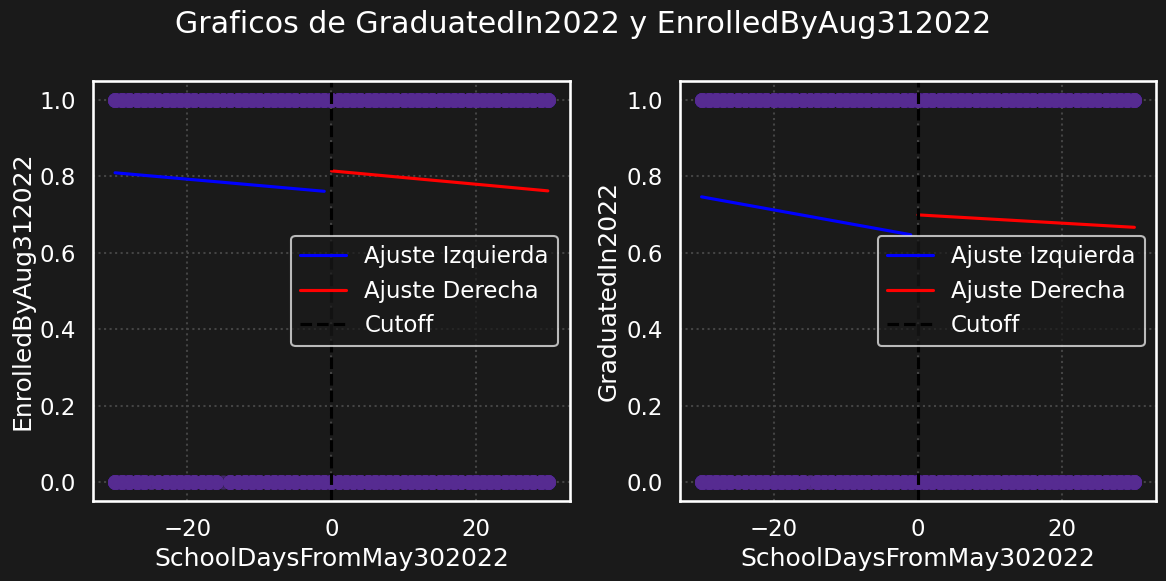

In [128]:
def plot_rd(df, outcome_var, running_var, cutoff, ax):
    # Filtrar los datos
    df_left = df[df[running_var] < cutoff]
    df_right = df[df[running_var] >= cutoff]

    # Ajustar un modelo lineal a cada lado del corte
    model_left = sm.OLS(df_left[outcome_var], sm.add_constant(df_left[running_var])).fit()
    model_right = sm.OLS(df_right[outcome_var], sm.add_constant(df_right[running_var])).fit()

    # Generar predicciones
    x_left = np.linspace(df_left[running_var].min(), df_left[running_var].max(), 100)
    x_right = np.linspace(df_right[running_var].min(), df_right[running_var].max(), 100)
    
    y_left = model_left.predict(sm.add_constant(x_left))
    y_right = model_right.predict(sm.add_constant(x_right))

    # Graficar los datos
    ax.scatter(df[running_var], df[outcome_var], alpha=0.5)
    ax.plot(x_left, y_left, color='blue', label='Ajuste Izquierda')
    ax.plot(x_right, y_right, color='red', label='Ajuste Derecha')
    ax.axvline(cutoff, color='black', linestyle='--', label='Cutoff')
    ax.set_xlabel(running_var)
    ax.set_ylabel(outcome_var)
    ax.legend()

# Crear una figura para ambos gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para EnrolledByAug312022
plot_rd(df, 'EnrolledByAug312022', 'SchoolDaysFromMay302022', cutoff, axs[0])

# Gráfico para GraduatedIn2022
plot_rd(df, 'GraduatedIn2022', 'SchoolDaysFromMay302022', cutoff, axs[1])
plt.suptitle('Graficos de GraduatedIn2022 y EnrolledByAug312022')
plt.tight_layout()
plt.savefig('../figures/pregunta4.png')


plt.show()


## Pregunta 5

In [135]:
# Ajustar el modelo de regresión discontinua para EnrolledByAug312022
formula_enrollment = 'EnrolledByAug312022 ~ DroppedOutMay30Before + SchoolDaysFromMay302022 + DroppedOutMay30Before:SchoolDaysFromMay302022  + I(SchoolDaysFromMay302022**2) + DroppedOutMay30Before:SchoolDaysFromMay302022 + DroppedOutMay30Before:I(SchoolDaysFromMay302022**2) + C(IDschool) + C(DayOfWeekDroppedOut)'

# Ajustar el modelo
model_enrollment = sm.OLS.from_formula(formula_enrollment, data=df.dropna())
results_enrollment = model_enrollment.fit()

# Resumen del modelo
print(results_enrollment.summary())

                             OLS Regression Results                            
Dep. Variable:     EnrolledByAug312022   R-squared:                       0.347
Model:                             OLS   Adj. R-squared:                  0.106
Method:                  Least Squares   F-statistic:                     1.441
Date:                 Fri, 04 Oct 2024   Prob (F-statistic):           1.58e-27
Time:                         15:10:57   Log-Likelihood:                -2597.1
No. Observations:                 8416   AIC:                             9734.
Df Residuals:                     6146   BIC:                         2.571e+04
Df Model:                         2269                                         
Covariance Type:             nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [136]:
# Ajustar el modelo de regresión discontinua para EnrolledByAug312022
formula_enrollment = 'GraduatedIn2022 ~ DroppedOutMay30Before + SchoolDaysFromMay302022 + DroppedOutMay30Before:SchoolDaysFromMay302022  + I(SchoolDaysFromMay302022**2) + DroppedOutMay30Before:SchoolDaysFromMay302022 + DroppedOutMay30Before:I(SchoolDaysFromMay302022**2) + C(IDschool) + C(DayOfWeekDroppedOut)'

# Ajustar el modelo
model_enrollment = sm.OLS.from_formula(formula_enrollment, data=df.dropna())
results_enrollment = model_enrollment.fit()

# Resumen del modelo
print(results_enrollment.summary())

                            OLS Regression Results                            
Dep. Variable:        GraduatedIn2022   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     1.539
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           8.55e-38
Time:                        15:35:07   Log-Likelihood:                -3523.6
No. Observations:                8416   AIC:                         1.159e+04
Df Residuals:                    6146   BIC:                         2.756e+04
Df Model:                        2269                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

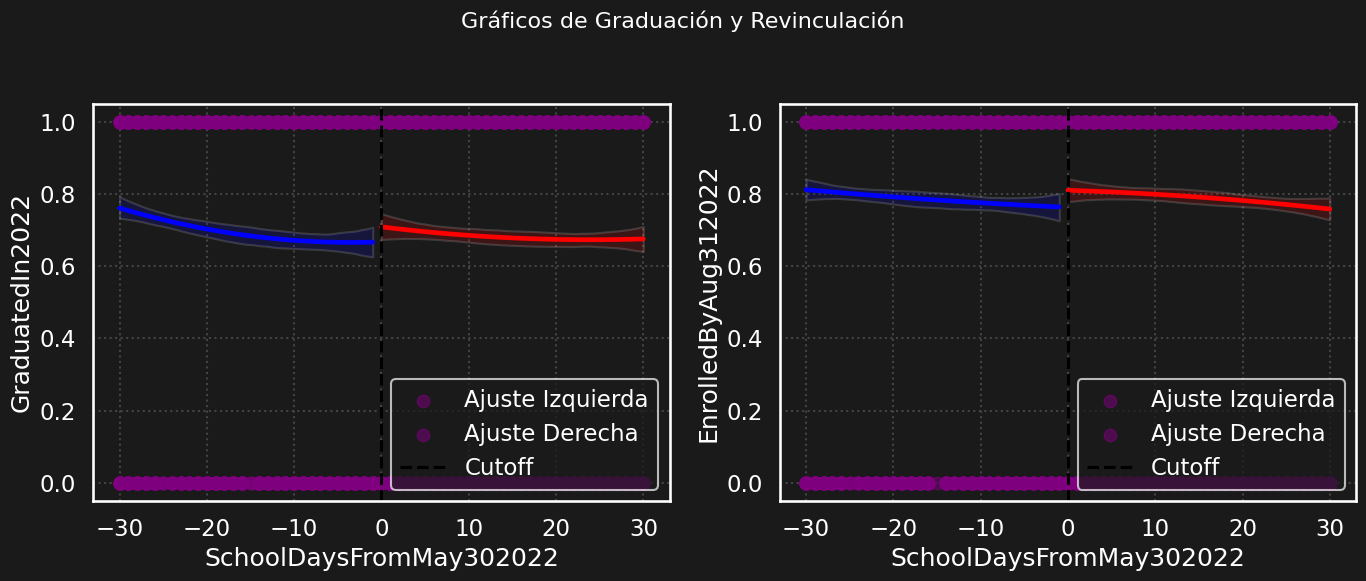

In [168]:
def plot_rd(df, outcome_var, running_var, cutoff, ax, order):
    # Filtrar los datos
    df_left = df[df[running_var] < cutoff]
    df_right = df[df[running_var] >= cutoff]

    # Graficar datos con regplot y ajuste cúbico
    sns.regplot(data=df_left, 
                x=running_var, 
                y=outcome_var, 
                order=order, 
                ci=95,  # Banda de confianza
                scatter_kws={'alpha': 0.5, 'color': 'purple'},
                line_kws={'color': 'blue'},
                ax=ax,
                label='Ajuste Izquierda')

    sns.regplot(data=df_right, 
                x=running_var, 
                y=outcome_var, 
                order=order, 
                ci=95,  # Banda de confianza
                scatter_kws={'alpha': 0.5, 'color': 'purple'},
                line_kws={'color': 'red'},
                ax=ax,
                label='Ajuste Derecha')

    # Añadir línea de corte
    ax.axvline(cutoff, color='black', linestyle='--', label='Cutoff')

    # Configurar etiquetas y leyenda
    ax.set_xlabel(running_var)
    ax.set_ylabel(outcome_var)
    ax.legend(loc='lower right')
    ax.grid(True)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Graficar GraduatedIn2022
plot_rd(df, 'GraduatedIn2022', 'SchoolDaysFromMay302022', cutoff, axs[0], order=2)

# Graficar EnrolledByAug312022
plot_rd(df, 'EnrolledByAug312022', 'SchoolDaysFromMay302022', cutoff, axs[1], order=2)

plt.suptitle('Gráficos de Graduación y Revinculación', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el layout para incluir el título
plt.savefig('../figures/pregunta6_cuadratica.png')
plt.show()

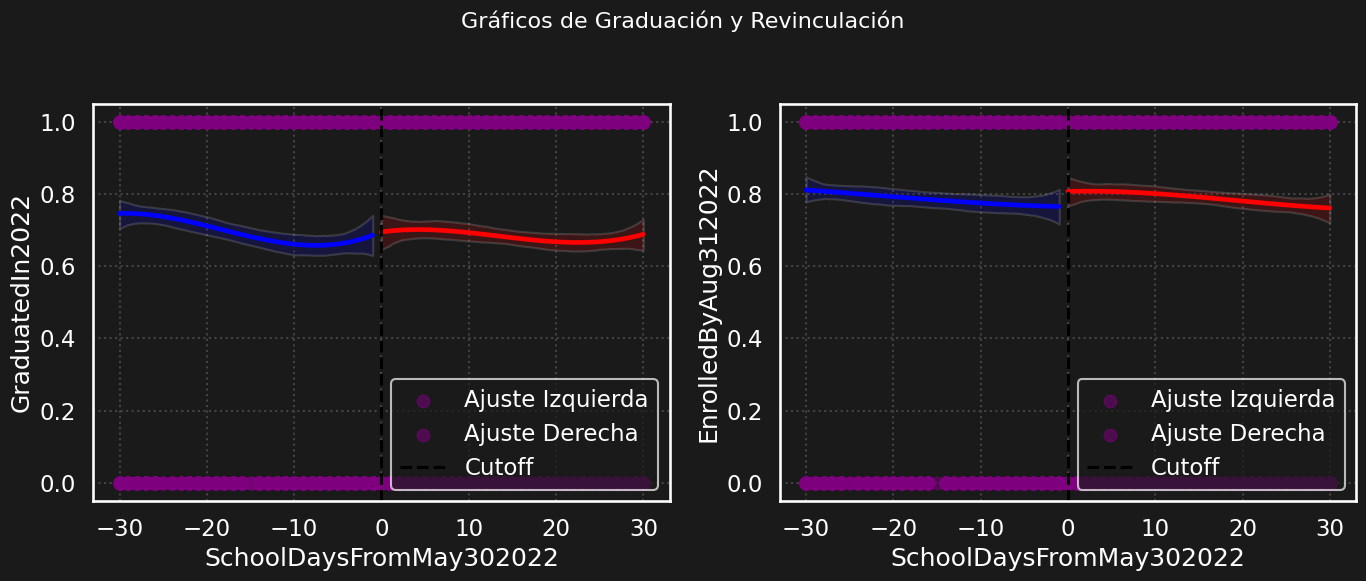

In [170]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Graficar GraduatedIn2022
plot_rd(df, 'GraduatedIn2022', 'SchoolDaysFromMay302022', cutoff, axs[0], order=3)

# Graficar EnrolledByAug312022
plot_rd(df, 'EnrolledByAug312022', 'SchoolDaysFromMay302022', cutoff, axs[1], order=3)

plt.suptitle('Gráficos de Graduación y Revinculación', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.savefig('../figures/pregunta6_cubica.png')
# Ajustar el layout para incluir el título

plt.show()

## Pregunta 7

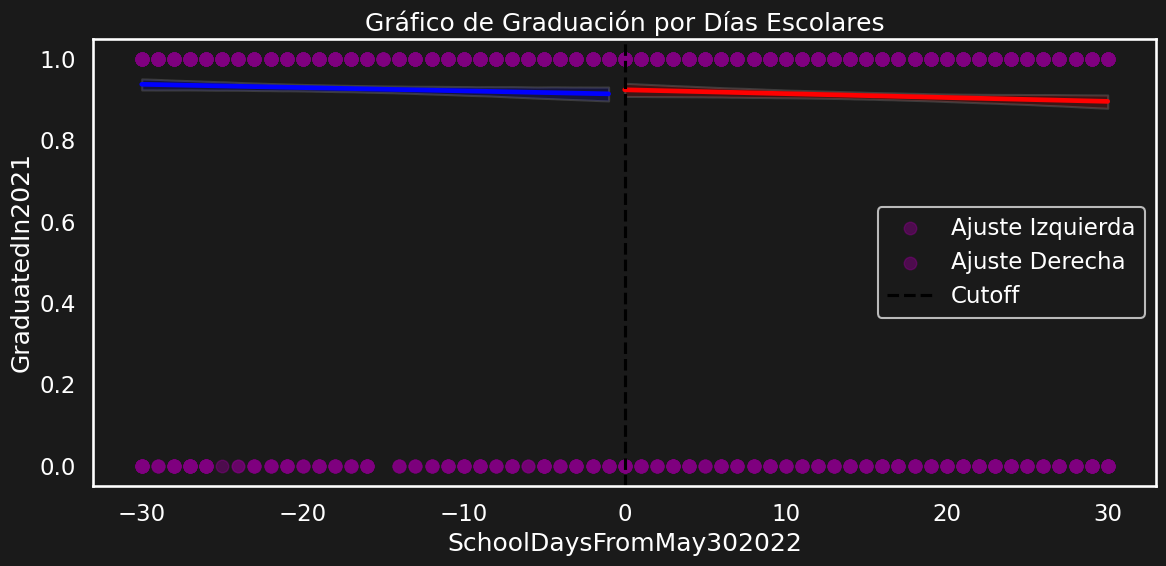

In [177]:
# Crear la figura
plt.figure(figsize=(12, 6))

# Gráfico de la parte izquierda del cutoff
sns.regplot(data=df[df['SchoolDaysFromMay302022'] < cutoff], 
            x='SchoolDaysFromMay302022', 
            y='GraduatedIn2021', 
            ci=95,  # Banda de confianza al 95%
            scatter_kws={'color': 'purple', 'alpha': 0.5},
            line_kws={'color': 'blue'},
            order=1,
            label='Ajuste Izquierda')

# Gráfico de la parte derecha del cutoff
sns.regplot(data=df[df['SchoolDaysFromMay302022'] >= cutoff], 
            x='SchoolDaysFromMay302022', 
            y='GraduatedIn2021', 
            ci=95,
            scatter_kws={'color': 'purple', 'alpha': 0.5},
            line_kws={'color': 'red'},
            order=1,
            label='Ajuste Derecha')

# Añadir línea de corte
plt.axvline(cutoff, color='black', linestyle='--', label='Cutoff')

# Añadir etiquetas y título
plt.xlabel('SchoolDaysFromMay302022')
plt.ylabel('GraduatedIn2021')
plt.title('Gráfico de Graduación por Días Escolares')
plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig('../figures/pregunta7.png')
plt.show()


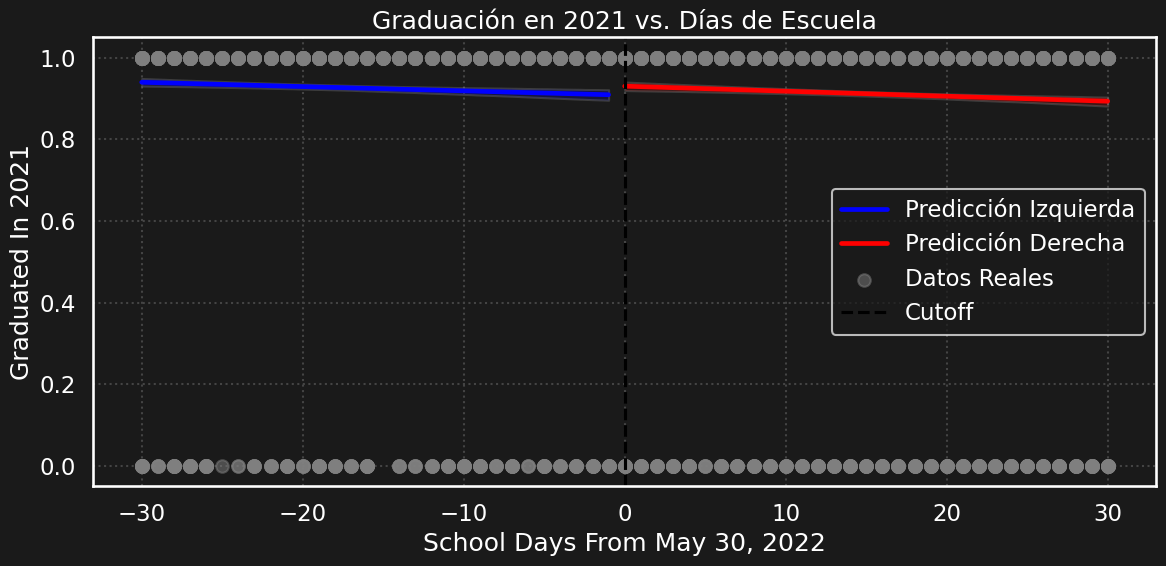

In [178]:
# Incluir covariables
df = df.dropna()
df['running_var'] = df['SchoolDaysFromMay302022']
X = df[['running_var', 'GPAin2021', 'AttendanceIn2021', 'Female', 'Migrant']]
X['running_var_sq'] = X['running_var'] ** 2
X = sm.add_constant(X)
y = df['GraduatedIn2021']

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Predecir valores utilizando el modelo
df['predicted'] = model.predict(X)

# Crear un gráfico
plt.figure(figsize=(12, 6))

# Graficar predicciones en el lado izquierdo del cutoff
sns.regplot(data=df[df['running_var'] < cutoff], 
            x='running_var', 
            y='predicted', 
            scatter=False, 
            color='blue', 
            label='Predicción Izquierda')

# Graficar predicciones en el lado derecho del cutoff
sns.regplot(data=df[df['running_var'] >= cutoff], 
            x='running_var', 
            y='predicted', 
            scatter=False, 
            color='red', 
            label='Predicción Derecha')

# Graficar los datos originales
plt.scatter(df['running_var'], df['GraduatedIn2021'], alpha=0.5, color='grey', label='Datos Reales')

# Añadir línea vertical en el cutoff
plt.axvline(cutoff, color='black', linestyle='--', label='Cutoff')

plt.xlabel('School Days From May 30, 2022')
plt.ylabel('Graduated In 2021')
plt.title('Graduación en 2021 vs. Días de Escuela')
plt.legend()
plt.tight_layout()

plt.savefig('../figures/pregunta8.png')

plt.show()


## Pregunta 10

In [179]:
ITT_estimate = 0.0485
first_stage_estimate = 0.3419

# Calcular RD Fuzzy
rd_fuzzy = ITT_estimate  / first_stage_estimate
print(f"RD Fuzzy Estimate: {rd_fuzzy:.3f}")

# Interpretación
interpretation = f"El estimador RD Fuzzy es {rd_fuzzy:.3f}, lo que indica que por cada incremento en la probabilidad de ser listado, se espera un aumento del {rd_fuzzy * 100:.1f}% en la probabilidad de revinculación escolar."
print(interpretation)


RD Fuzzy Estimate: 0.142
El estimador RD Fuzzy es 0.142, lo que indica que por cada incremento en la probabilidad de ser listado, se espera un aumento del 14.2% en la probabilidad de revinculación escolar.


In [195]:
# 1. Estimación del primer paso
# Modelar ListedInDropoutReport como función de las covariables
first_stage_model = smf.ols(
    'ListedInDropoutReport ~ DroppedOutMay30Before + SchoolDaysFromMay302022 + DroppedOutMay30Before:SchoolDaysFromMay302022 + C(IDschool) + C(DayOfWeekDroppedOut)', 
    data=df
).fit()

print("First Stage Regression Results:")
print(first_stage_model.summary())

# 2. Generar predicciones de la probabilidad de ser listado
df['ListedInDropoutReport_Predicted'] = first_stage_model.predict()

# 3. Estimación del segundo paso
# Modelar EnrolledByAug312022 como función de la predicción del primer paso y otras covariables
second_stage_model = smf.ols(
    'EnrolledByAug312022 ~ ListedInDropoutReport_Predicted + SchoolDaysFromMay302022 + DroppedOutMay30Before:SchoolDaysFromMay302022 + C(IDschool) + C(DayOfWeekDroppedOut)', 
    data=df
).fit()

print("Second Stage Regression Results:")
print(second_stage_model.summary())

# 4. Interpretar resultados
# Extraer el coeficiente relevante para el impacto
impact_estimate = second_stage_model.params['ListedInDropoutReport_Predicted']
print(f"Impact Estimate (coefficient for ListedInDropoutReport_Predicted): {impact_estimate:.3f}")

# Interpretación
interpretation = (
    f"El estimador del impacto es {impact_estimate:.3f}, "
    f"lo que indica que por cada unidad de incremento en la probabilidad de ser listado en el reporte, "
    f"se espera un aumento de {impact_estimate * 100:.1f}% en la probabilidad de revinculación escolar."
)
print(interpretation)

First Stage Regression Results:
                              OLS Regression Results                             
Dep. Variable:     ListedInDropoutReport   R-squared:                       0.437
Model:                               OLS   Adj. R-squared:                  0.233
Method:                    Least Squares   F-statistic:                     2.142
Date:                   Fri, 04 Oct 2024   Prob (F-statistic):          2.09e-118
Time:                           17:23:41   Log-Likelihood:                -1518.9
No. Observations:                   8516   AIC:                             7574.
Df Residuals:                       6248   BIC:                         2.356e+04
Df Model:                           2267                                         
Covariance Type:               nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------